In [1]:
import wandb
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
sns.set_style('whitegrid')
import os
os.chdir('..')

In [2]:
api = wandb.Api()

fontsize=15
ticksize=11
titlesize=20
imgsize=7
linewidth=3
markersize=10

In [3]:
from core.data.datasets import MultiOmniglot
n_images = 3
train_set = MultiOmniglot("/data/OMNIGLOT", n_images=n_images)

mis = np.cumsum([np.log(train_set.n_characters[alphabet]) for alphabet in train_set.used_alphabets])
mis

/home/marco/anaconda3/envs/dl-kit/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


array([ 4.00733319,  7.9585769 , 11.82977791])

[45, 50, 37]

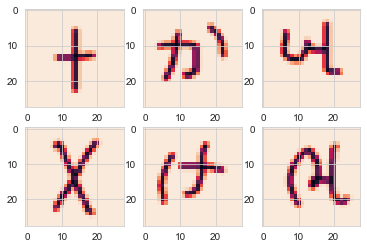

In [4]:
f, ax = plt.subplots(2,3)
for i in range(3):
    ax[0,i].imshow(train_set[0]['x'][i])
    ax[1,i].imshow(train_set[0]['y'][i])
train_set[0]['t']

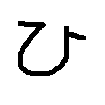

In [5]:
train_set.get_image(train_set.used_alphabets[1], 27, 5)

In [6]:
# DATA_DIR=<DIRECTORY> wandb agent badboyz2000/multiomniglot/vzv5kurz

In [7]:
runs = list(api.sweep('badboyz2000/multiomniglot/vzv5kurz').runs)
runs += list(api.sweep('badboyz2000/multiomniglot/jqjc2x4g').runs)
results = []

config_keys = {
    "fit.model.init_args.mi_estimator.init_args.discriminative_estimator.class_path" : "Discriminative estimator",
    "fit.model.init_args.mi_estimator.init_args.generative_estimator.class_path": "Generative estimator",
    "fit.model.init_args.mi_estimator.init_args.discriminative_estimator.init_args.neg_samples": "Negative samples",
    "fit.data.init_args.n_images": "N Images"
}

results_keys = {
    "mi/value/train_epoch": "mi",
    "mi/grad/variance/train_epoch" : "Variance",
    "mi/gen/grad/variance/train_epoch" : "Generative Variance",
    "mi/gen/value/train_epoch": "generative mi",
    "mi/dis/value/train_epoch": "discriminative mi",
    "_runtime": "runtime"
}


for run in tqdm(runs):
    if run.state == "finished" and run.summary["trainer/global_step"]>90000:
        entry = {}
        for key, name in config_keys.items():
            if key in run.config:
                entry[name] = run.config[key]
            else:
                entry[name] = "None"
        for key, name in results_keys.items():
            entry[name] = float(run.summary[key])
        entry["name"] = run.name

        results.append(entry)
    else:
        print(run.name, run.state)

results = pd.DataFrame(results)

  0%|          | 0/26 [00:00<?, ?it/s]

logical-sweep-14 running
driven-sweep-13 running
likely-sweep-12 running
sage-sweep-11 running
happy-sweep-12 running
cool-sweep-11 running
celestial-sweep-10 running
apricot-sweep-9 running


In [8]:
results["True mi"] = mis[results["N Images"]-1]
results["Bias"] = np.abs(results["mi"]-results["True mi"])
results["Generative estimator"] = [r.split('.')[-1] for r in results["Generative estimator"]]
results["Discriminative estimator"] = [r.split('.')[-1] for r in results["Discriminative estimator"]]
results

,Discriminative estimator,Generative estimator,Negative samples,N Images,mi,Variance,Generative Variance,generative mi,discriminative mi,runtime,name,True mi,Bias
0,MINE,None,1,1,5.883541e+00,4.351635e-01,0.000000,0.000000,5.883541e+00,3274.704770,lyric-sweep-10,4.007333,1.876207
1,JS,None,1,1,4.052562e+00,2.069217e-03,0.000000,0.000000,4.052562e+00,3087.715108,vital-sweep-9,4.007333,0.045229
2,NWJ,None,1,1,-2.195080e-08,3.714903e-17,0.000000,0.000000,-2.195080e-08,3271.848081,feasible-sweep-8,4.007333,4.007333
3,FLO,None,1,1,4.815253e-08,4.408310e-12,0.000000,0.000000,4.815253e-08,3301.171991,fancy-sweep-7,4.007333,4.007333
4,AlphaTUBA,None,0,1,3.794158e+00,2.314609e-03,0.000000,0.000000,3.794158e+00,3367.733960,efficient-sweep-6,4.007333,0.213175
5,InfoNCE,None,0,1,3.825603e+00,2.229276e-03,0.000000,0.000000,3.825603e+00,2973.994459,genial-sweep-5,4.007333,0.181730
6,SMILE,None,1,1,4.605157e+00,2.068029e-03,0.000000,0.000000,4.605157e+00,3078.833490,desert-sweep-4,4.007333,0.597824
7,MINE,None,1,1,6.046667e+00,4.348560e-01,0.000000,0.000000,6.046667e+00,3092.900296,lemon-sweep-3,4.007333,2.039333
8,JS,None,1,1,4.053207e+00,2.067504e-03,0.000000,0.000000,4.053207e+00,2897.247782,pretty-sweep-2,4.007333,0.045874
9,NWJ,None,1,1,4.052509e+00,3.973326e-01,0.000000,0.000000,4.052509e+00,2539.200076,sunny-sweep-1,4.007333,0.045176


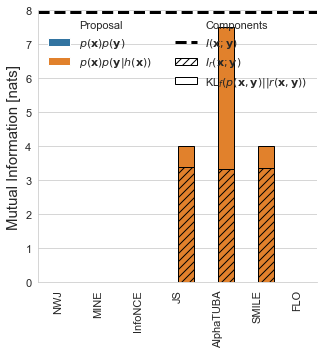

In [10]:
f, ax = plt.subplots(1,1, figsize=(5,5))

ax = [ax]

n_images = 2
mi = mis[n_images-1]

disc_models_to_show = ["NWJ", "MINE", "InfoNCE", "JS", "AlphaTUBA", "SMILE", "FLO"] #
hue_order = ["None", "ABC"]

g_0 = sns.barplot(
    results[results["N Images"]==n_images],
    x="Discriminative estimator",
    order=disc_models_to_show,
    hue="Generative estimator",
    hue_order=hue_order,
    edgecolor='k',
    y="mi",
    ax=ax[0]
)

for line in ax[0].lines: # put this before you call the 'mean' plot function.
    line.set_label(s='')

g = sns.barplot(
    results[results["N Images"]==n_images],
    order=disc_models_to_show,
    x="Discriminative estimator",
    hue="Generative estimator",
    hue_order=hue_order,
    y="generative mi",
    hatch='///',
    edgecolor='k',
    ax=ax[0],
)

g.legend_.remove()


ax[0].set_ylim(0,8)
ax[0].set_ylabel("Mutual Information [nats]", fontsize=fontsize)
# ax[1].set_ylabel("Variance [nats$^2$]", fontsize=fontsize)

for i in range(1):
    ax[i].set_xlabel("")
    ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=fontsize)
    ax[i].tick_params(axis='both', which='major', labelsize=ticksize)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

ax[0].axhline(y=mi, color='k', ls='--', linewidth=linewidth)#, label="$I({\\bf x};{\\bf y})$")




# for i, legobj in enumerate(leg.legendHandles):
#     if i > len(hue_order):
#         legobj.hide()
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.text import Text

leg = ax[0].legend(handles=[
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='Proposal', alpha=0),
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='$p({\\bf x})p({\\bf y})$'),
    Patch(facecolor=ax[0].patches[len(disc_models_to_show)].get_facecolor(), label='$p({\\bf x})p({\\bf y}|h({\\bf x}))$'),
],
fontsize=ticksize, frameon=False, loc="upper left")

plt.gca().add_artist(leg)

ax[0].legend(handles=[
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='Components', alpha=0),
    Line2D([0],[0], linestyle='--', linewidth=linewidth, color='k', label='$I({\\bf x};{\\bf y})$'),
    Patch(edgecolor='k', facecolor="w", label='$I_r({\\bf x};{\\bf y})$', hatch='///'),
    Patch(edgecolor='k', facecolor="w", label='KL$_f(p({\\bf x},{\\bf y})||r({\\bf x},{\\bf y}))$'),
], fontsize=ticksize, frameon=False, loc="upper right")

sns.despine()

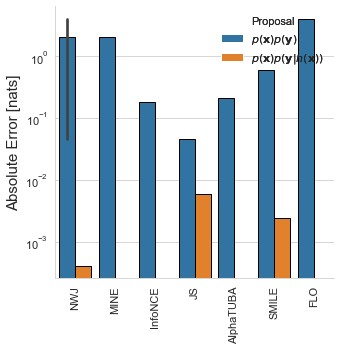

In [13]:
f, ax = plt.subplots(1,1, figsize=(5,5))

ax = [ax]

mi = mis[n_images-1]

disc_models_to_show = ["NWJ", "MINE", "InfoNCE", "JS", "AlphaTUBA", "SMILE", "FLO"] #
hue_order = ["None", "ABC"]

g_0 = sns.barplot(
    results[results["N Images"]==n_images],
    x="Discriminative estimator",
    order=disc_models_to_show,
    hue="Generative estimator",
    hue_order=hue_order,
    edgecolor='k',
    y="Bias",
    ax=ax[0]
)

ax[0].set_yscale("log")

for line in ax[0].lines: # put this before you call the 'mean' plot function.
    line.set_label(s='')


# ax[0].set_yscale("log")
ax[0].set_ylabel("Absolute Error [nats]", fontsize=fontsize)
# ax[1].set_ylabel("Variance [nats$^2$]", fontsize=fontsize)

for i in range(1):
    ax[i].set_xlabel("")
    ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=fontsize)
    ax[i].tick_params(axis='both', which='major', labelsize=ticksize)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)


# for i, legobj in enumerate(leg.legendHandles):
#     if i > len(hue_order):
#         legobj.hide()
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.text import Text

leg = ax[0].legend(handles=[
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='Proposal', alpha=0),
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='$p({\\bf x})p({\\bf y})$'),
    Patch(facecolor=ax[0].patches[len(disc_models_to_show)].get_facecolor(), label='$p({\\bf x})p({\\bf y}|h({\\bf x}))$'),
],
fontsize=ticksize, frameon=False, loc="upper right")


plt.gca().add_artist(leg)


sns.despine()

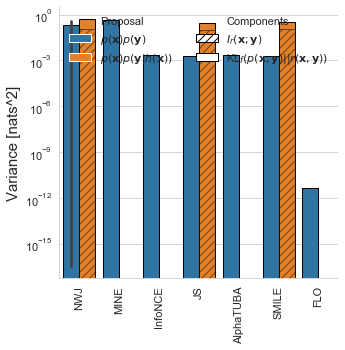

In [15]:
f, ax = plt.subplots(1,1, figsize=(5,5))

ax = [ax]

mi = mis[n_images-1]

disc_models_to_show = ["NWJ", "MINE", "InfoNCE", "JS", "AlphaTUBA", "SMILE", "FLO"] #
hue_order = ["None", "ABC"]

g_0 = sns.barplot(
    results[results["N Images"]==n_images],
    x="Discriminative estimator",
    order=disc_models_to_show,
    hue="Generative estimator",
    hue_order=hue_order,
    edgecolor='k',
    y="Variance",
    ax=ax[0]
)

for line in ax[0].lines: # put this before you call the 'mean' plot function.
    line.set_label(s='')

g = sns.barplot(
    results[results["N Images"]==n_images],
    order=disc_models_to_show,
    x="Discriminative estimator",
    hue="Generative estimator",
    hue_order=hue_order,
    y="Generative Variance",
    hatch='///',
    edgecolor='k',
    ax=ax[0],
    alpha=0.5,
)

g.legend_.remove()
#
#

# ax[1].set_yscale("log")
# g.legend_.remove()

# g_0.legend_.draw()


# leg = ax[0].legend(fontsize=ticksize, loc='center left', bbox_to_anchor=(1, 0.5), title="Generative Model")


ax[0].set_yscale("log")

ax[0].set_ylabel("Variance [nats^2]", fontsize=fontsize)
# ax[1].set_ylabel("Variance [nats$^2$]", fontsize=fontsize)

for i in range(1):
    ax[i].set_xlabel("")
    ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=fontsize)
    ax[i].tick_params(axis='both', which='major', labelsize=ticksize)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)






# for i, legobj in enumerate(leg.legendHandles):
#     if i > len(hue_order):
#         legobj.hide()
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.text import Text

leg = ax[0].legend(handles=[
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='Proposal', alpha=0),
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='$p({\\bf x})p({\\bf y})$'),
    Patch(facecolor=ax[0].patches[len(disc_models_to_show)].get_facecolor(), label='$p({\\bf x})p({\\bf y}|h({\\bf x}))$'),
],
fontsize=ticksize, frameon=False, loc="upper left")

plt.gca().add_artist(leg)


ax[0].legend(handles=[
    Patch(facecolor=ax[0].patches[0].get_facecolor(), label='Components', alpha=0),
    Patch(edgecolor='k', facecolor="w", label='$I_r({\\bf x};{\\bf y})$', hatch='///'),
    Patch(edgecolor='k', facecolor="w", label='KL$_f(p({\\bf x},{\\bf y})||r({\\bf x},{\\bf y}))$'),
], fontsize=ticksize, frameon=False, loc="upper right")

sns.despine()